# Coeficiente de Gini.
O Coeficiente de Gini consiste em um número entre 0 e 1, onde 0 corresponde à completa igualdade (no caso do rendimento, por exemplo, toda a população recebe o mesmo salário) e 1 corresponde à completa desigualdade (onde uma pessoa recebe todo o rendimento e as demais nada recebem).

O índice de Gini é o coeficiente expresso em pontos percentuais (é igual ao coeficiente multiplicado por 100).


## Como é calculando.
O coeficiente de Gini se calcula[2] como uma razão das áreas no diagrama da curva de Lorenz. Se a área entre a linha de perfeita igualdade e a curva de Lorenz é A, e a área abaixo da curva de Lorenz é B, então o coeficiente de Gini é igual a A/(A+B). Esta razão se expressa como percentagem ou como equivalente numérico dessa percentagem, que é sempre um número entre 0 e 1. O coeficiente de Gini pode ser calculado com a Fórmula de Brown, que é mais prática:
$$G = 1 - \sum^{k=n-1}_{k=0} (X_{k+1} - X_k)$$

* Coeficiente de Gini G.
* X acumulada da variavel da "população".
* Y proporção acumulada da variável "renda".
  

## Gráfico:
![img](https://upload.wikimedia.org/wikipedia/commons/b/ba/Economics_Gini_coefficient.png)

* G = $\frac{a}{a+b}$
* eixo vertical é a renda.
* eixo horizontal é as pessoas.

# Pratica.

In [5]:
import random 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

(array([32., 24., 19., 23., 28., 27., 25., 23., 23., 29., 22., 20., 27.,
        26., 24., 21., 28., 26., 21., 32.]),
 array([3.57425735e-04, 4.97572672e-02, 9.91571086e-02, 1.48556950e-01,
        1.97956792e-01, 2.47356633e-01, 2.96756474e-01, 3.46156316e-01,
        3.95556157e-01, 4.44955999e-01, 4.94355840e-01, 5.43755682e-01,
        5.93155523e-01, 6.42555365e-01, 6.91955206e-01, 7.41355048e-01,
        7.90754889e-01, 8.40154731e-01, 8.89554572e-01, 9.38954413e-01,
        9.88354255e-01]),
 <BarContainer object of 20 artists>)

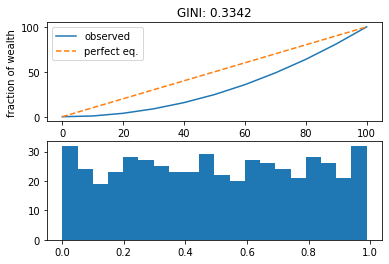

In [6]:
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # 
    pe_area = np.trapz(bins, x=bins)
    # 
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

v = np.random.rand(500)
bins, result, gini_val = G(v)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)